HW:6: Burger's equation

$$ \frac{\partial{U}}{\partial{t}} + U \frac{\partial{U}}{\partial{x}} = 0$$


with the upwind method:

$$ U_x = \frac{U_j^n- U_{j-1}^n}{\Delta x}  \qquad if \qquad v>0 $$


$$ U_x = \frac{U_{j+1}^n-U_j^n }{\Delta x}  \qquad if \qquad v<0 $$

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
t =  11.040000000000008
t =  12.000000000000009
t =  13.12000000000001
t =  14.08000000000001
t =  15.040000000000012
t =  16.00000000000001
t =  17.12000000000001
t =  18.080000000000013
t =  19.040000000000013
t =  20.000000000000014
t =  21.120000000000015
t =  22.080000000000016
t =  23.040000000000017
t =  24.000000000000018
t =  25.12000000000002
t =  26.08000000000002
t =  27.04000000000002
t =  28.00000000000002
t =  29.120000000000022
t =  30.080000000000023
t =  31.040000000000024
t =  32.00000000000002
t =  33.12
t =  34.07999999999998
t =  35.03999999999996
t =  36.15999999999993
t =  37.11999999999991
t =  38.07999999999989
t =  39.03999999999987
t =  40.15999999999985
Done.


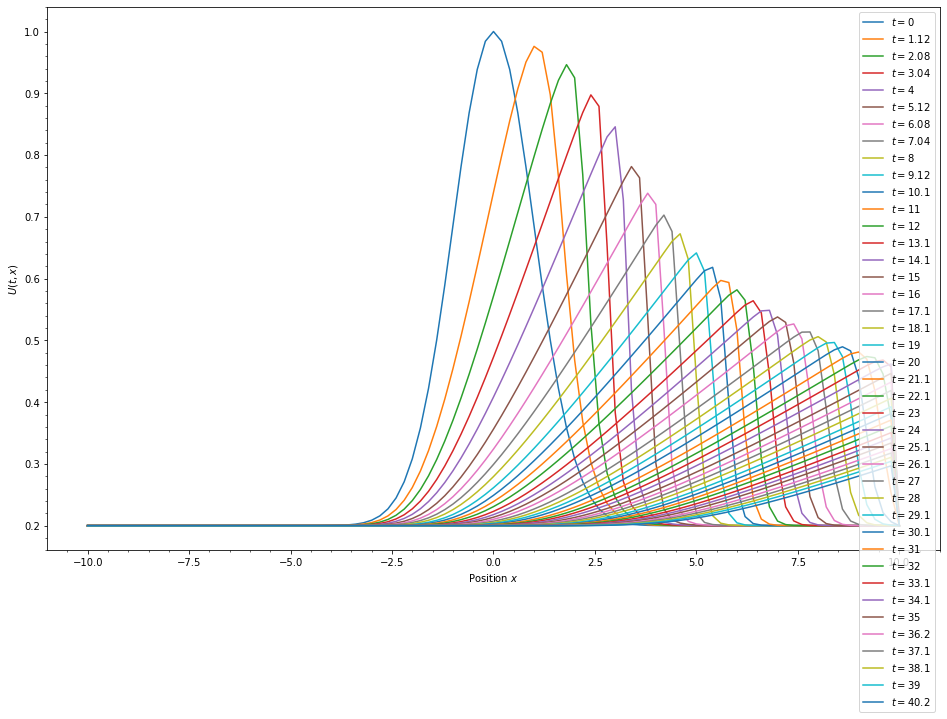

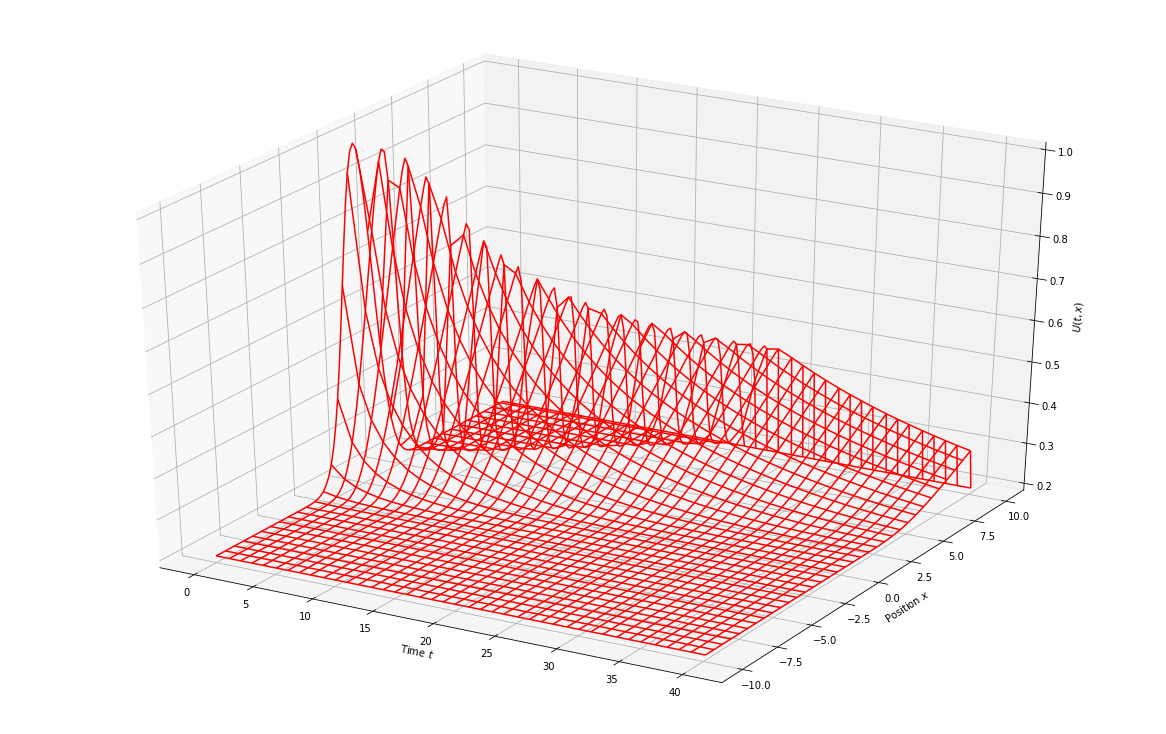

In [23]:
"""
HW:6: Burger's equation
Daniel Schacher

"""
# Burger's equation: Upwind method

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    
    for i in range(1, Nx - 1):
        if U[i] > 0:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i] - Uold[i - 1]) / dx
        else:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i + 1] - Uold[i]) / dx
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
t =  11.040000000000008
t =  12.000000000000009
t =  13.12000000000001
t =  14.08000000000001
t =  15.040000000000012
t =  16.00000000000001
t =  17.12000000000001
t =  18.080000000000013
t =  19.040000000000013
t =  20.000000000000014
t =  21.120000000000015
t =  22.080000000000016
t =  23.040000000000017
t =  24.000000000000018
t =  25.12000000000002
t =  26.08000000000002
t =  27.04000000000002
t =  28.00000000000002
t =  29.120000000000022
t =  30.080000000000023
t =  31.040000000000024
t =  32.00000000000002
t =  33.12
t =  34.07999999999998
t =  35.03999999999996
t =  36.15999999999993
t =  37.11999999999991
t =  38.07999999999989
t =  39.03999999999987
t =  40.15999999999985
Done.


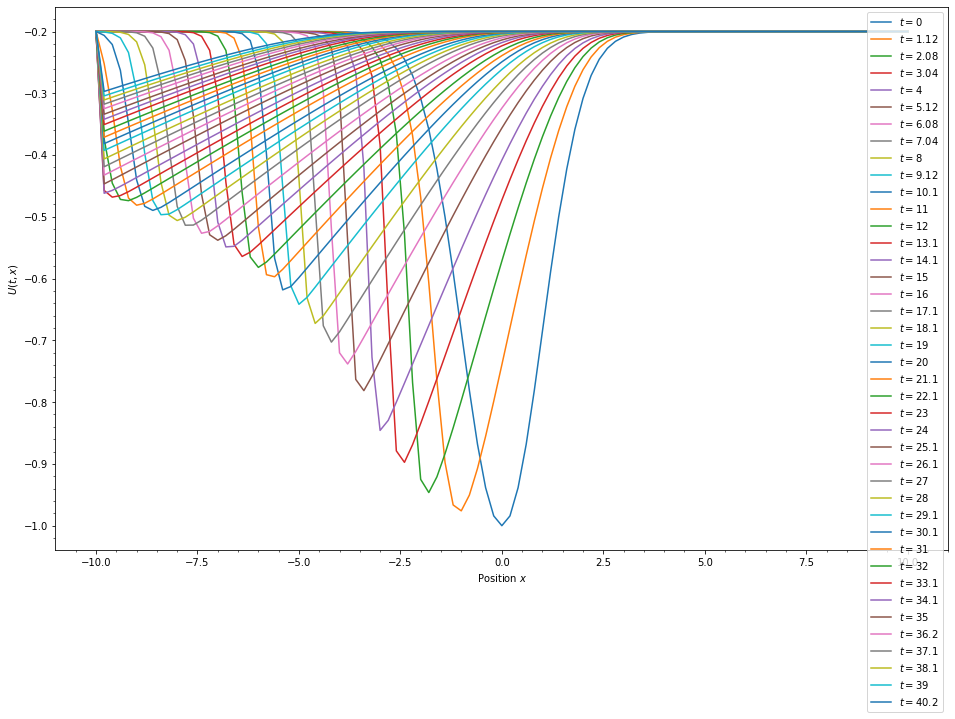

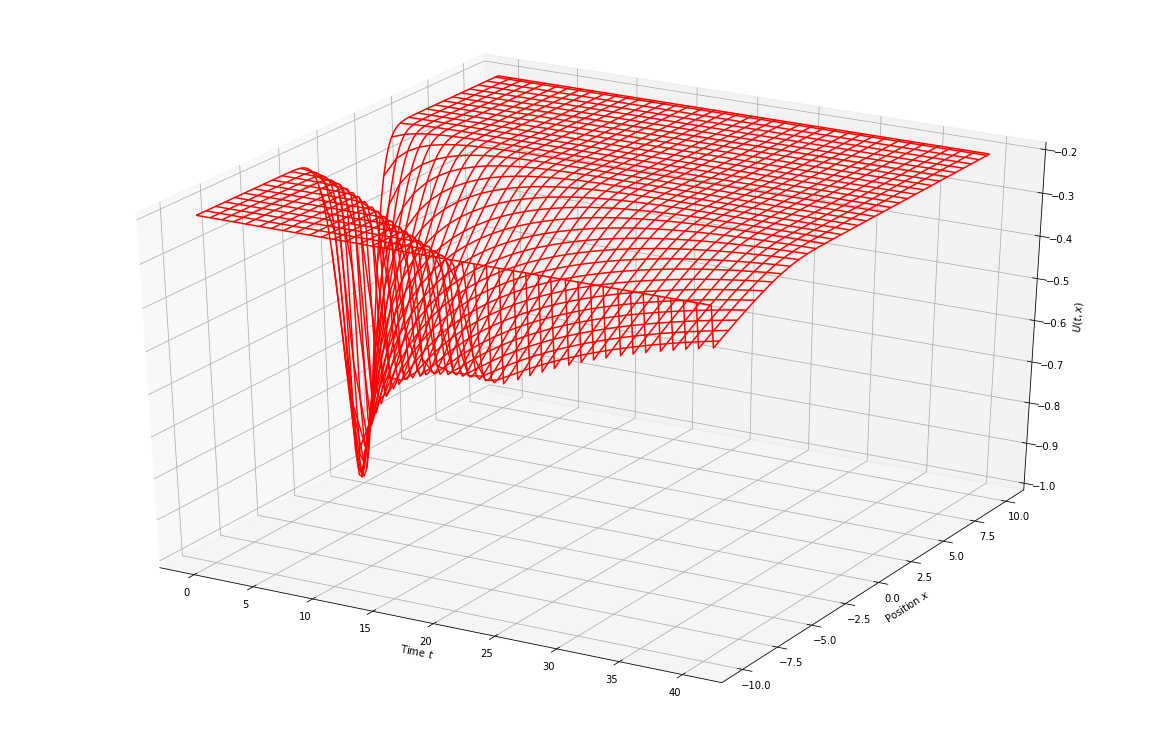

In [22]:
# Burger's equation: Upwind with negative velocities

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
# Using negative velocities
U = -U

tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    
    for i in range(1, Nx - 1):
        if U[i] > 0:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i] - Uold[i - 1]) / dx
        else:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i + 1] - Uold[i]) / dx
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
t =  11.040000000000008
t =  12.000000000000009
t =  13.12000000000001
t =  14.08000000000001
t =  15.040000000000012
t =  16.00000000000001
t =  17.12000000000001
t =  18.080000000000013
t =  19.040000000000013
t =  20.000000000000014
t =  21.120000000000015
t =  22.080000000000016
t =  23.040000000000017
t =  24.000000000000018
t =  25.12000000000002
t =  26.08000000000002
t =  27.04000000000002
t =  28.00000000000002
t =  29.120000000000022
t =  30.080000000000023
t =  31.040000000000024
t =  32.00000000000002
t =  33.12
t =  34.07999999999998
t =  35.03999999999996
t =  36.15999999999993
t =  37.11999999999991
t =  38.07999999999989
t =  39.03999999999987
t =  40.15999999999985
Done.


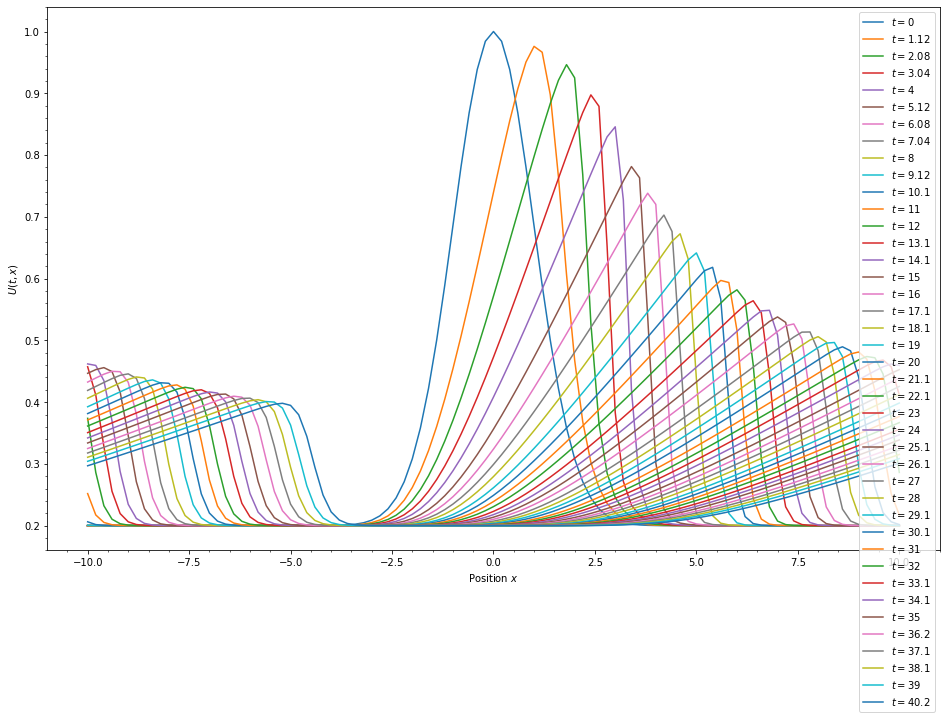

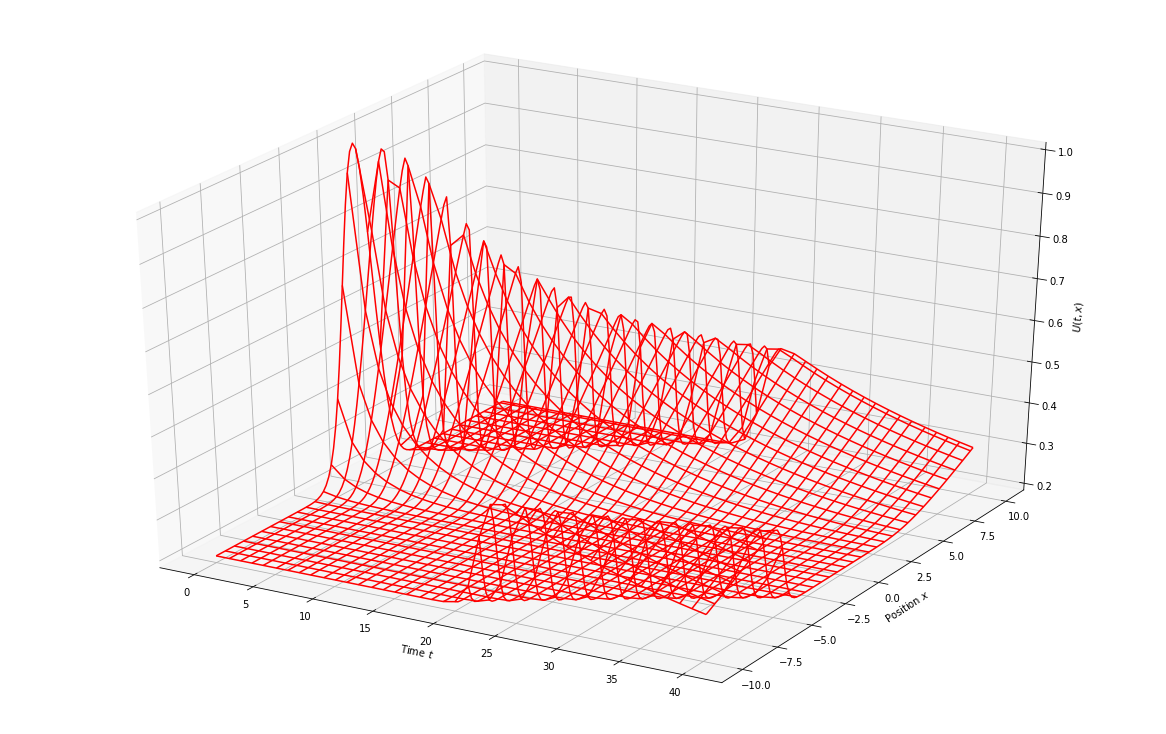

In [21]:
# Burger's equation: with boundry conditions and larger tend

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    
    for i in range(1, Nx - 1):
        if U[i] > 0:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i] - Uold[i - 1]) / dx
        else:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i + 1] - Uold[i]) / dx
    t += dt
    U[0] = U[-2]
    U[-1] = U[1]
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.0080000000000007
t =  2.0000000000000013
t =  3.0080000000000022
t =  4.000000000000003
t =  5.008000000000004
t =  6.000000000000004
t =  7.008000000000005
t =  8.000000000000005
t =  9.008000000000006
t =  10.000000000000007
t =  11.008000000000008
t =  12.000000000000009
t =  13.00800000000001
t =  14.00000000000001
t =  15.008000000000012
t =  16.00000000000001
t =  17.0079999999999
t =  18.01599999999979
t =  19.00799999999968
t =  20.01599999999957
t =  21.00799999999946
t =  22.015999999999348
t =  23.00799999999924
t =  24.015999999999128
t =  25.00799999999902
t =  26.015999999998908
t =  27.0079999999988
t =  28.015999999998687
t =  29.007999999998578
t =  30.015999999998467
t =  31.007999999998358
t =  32.01599999999825
t =  33.00799999999814
t =  34.01599999999803
t =  35.00799999999792
t =  36.01599999999781
t =  37.0079999999977
t =  38.01599999999759
t =  39.00799999999748
t =  40.01599999999737
Done.


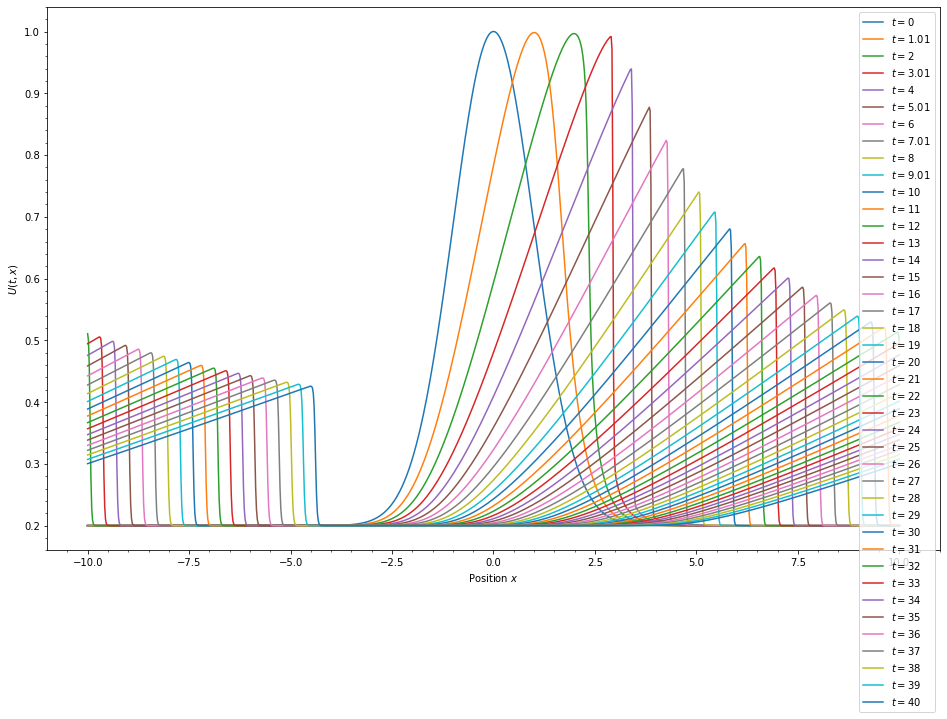

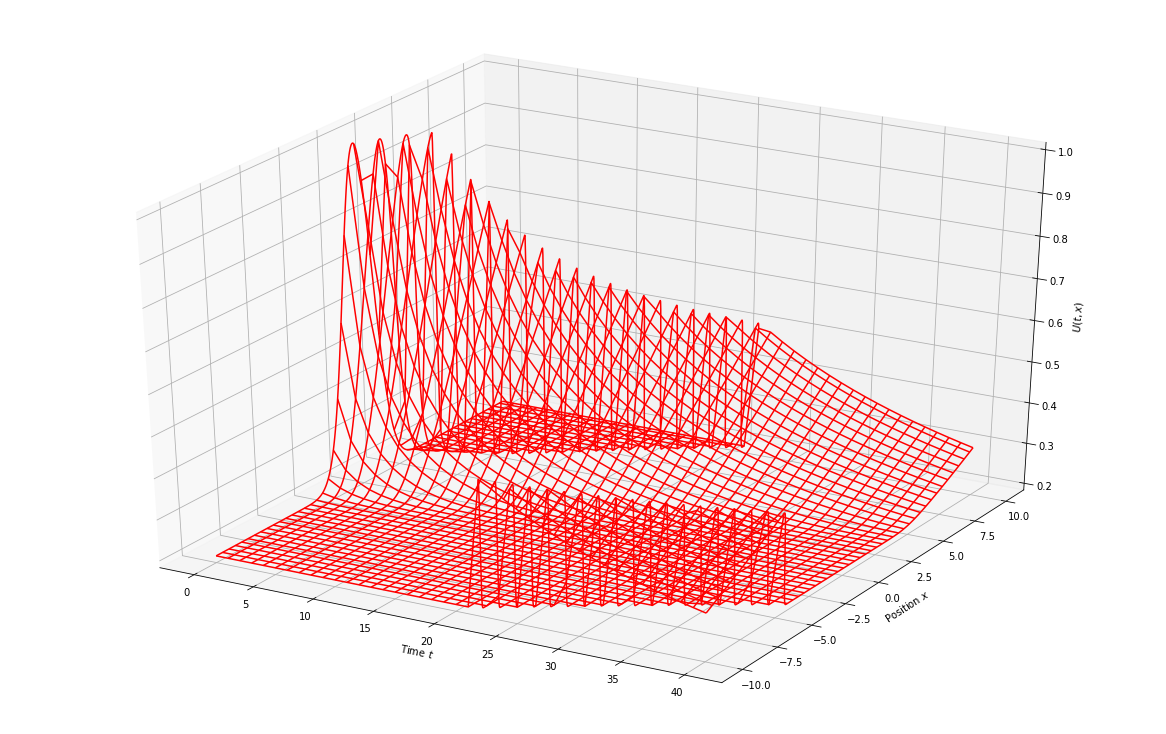

In [24]:
# Burger's equation: With bigger grid size

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 1001      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    
    for i in range(1, Nx - 1):
        if U[i] > 0:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i] - Uold[i - 1]) / dx
        else:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i + 1] - Uold[i]) / dx
    t += dt
    U[0] = U[-2]
    U[-1] = U[1]
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.0000000000000036
t =  6.000000000000004
t =  7.000000000000005
t =  8.000000000000005
t =  9.007999999999894
t =  10.007999999999784
t =  11.007999999999674
t =  12.007999999999564
t =  13.007999999999454
t =  14.007999999999344
t =  15.007999999999234
t =  16.007999999999125
t =  17.007999999999015
t =  18.007999999998905
t =  19.007999999998795
t =  20.007999999998685
t =  21.007999999998574
t =  22.007999999998464
t =  23.007999999998354
t =  24.007999999998244
t =  25.007999999998134
t =  26.007999999998024
t =  27.007999999997914
t =  28.007999999997804
t =  29.007999999997693
t =  30.007999999997583
t =  31.007999999997473
t =  32.00799999999737
t =  33.0079999999977
t =  34.007999999998034
t =  35.00799999999837
t =  36.0079999999987
t =  37.007999999999036
t =  38.00799999999937
t =  39.007999999999704
t =  40.000000000000036
Done.


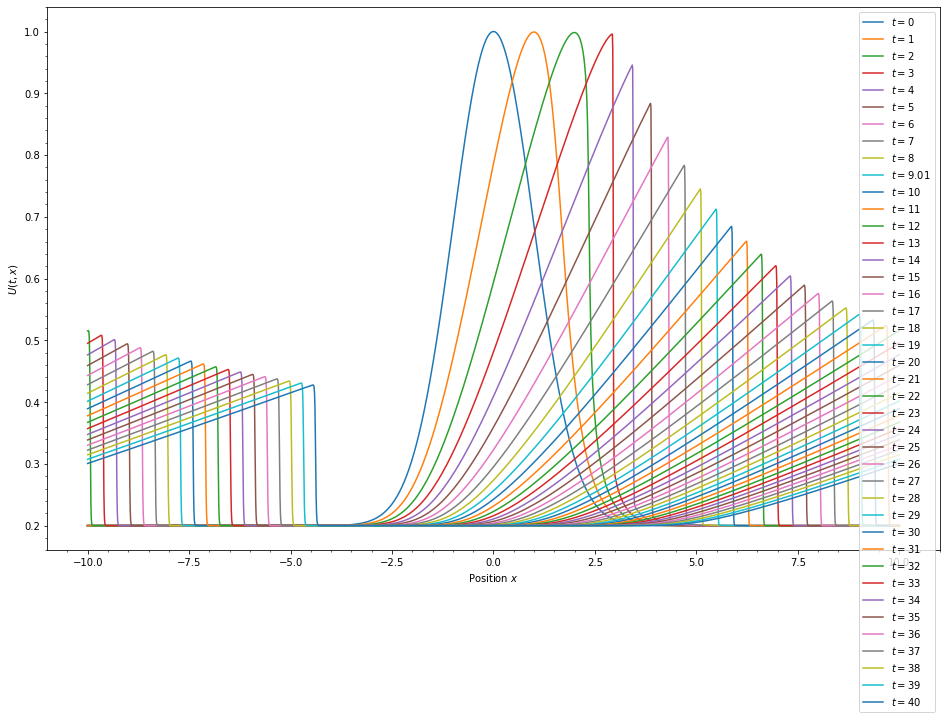

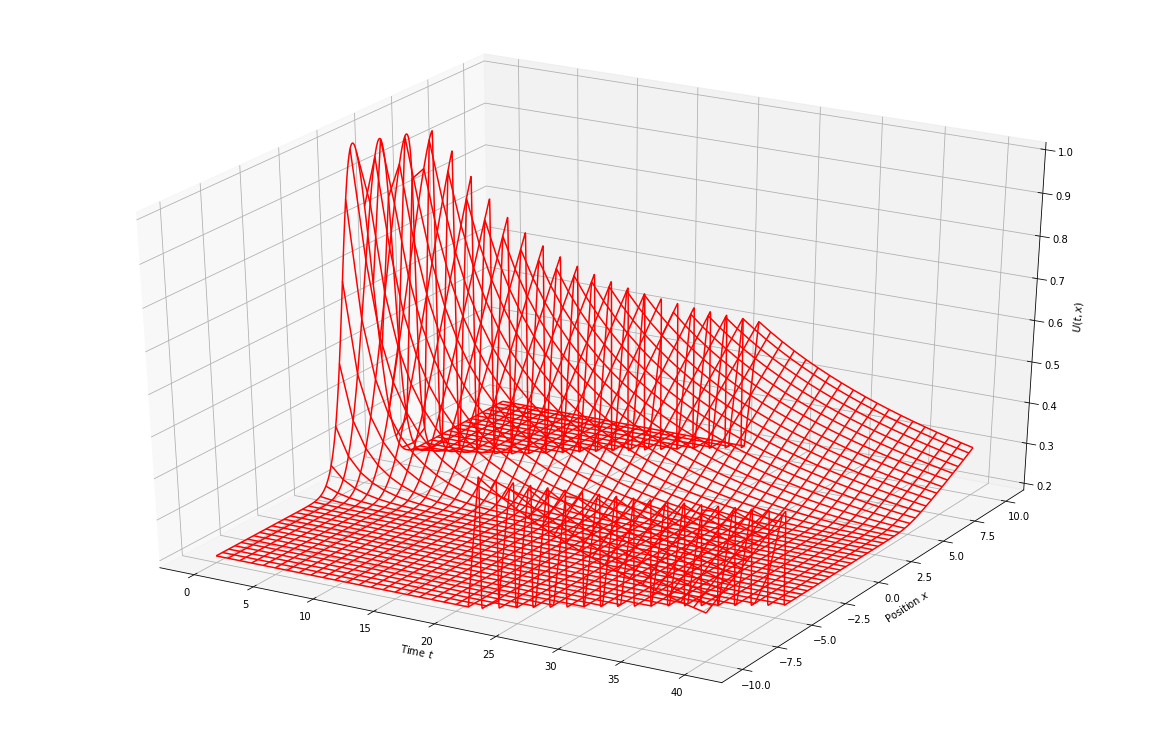

In [26]:
# Burger's equation: With bigger grid size

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 2001      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    
    for i in range(1, Nx - 1):
        if U[i] > 0:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i] - Uold[i - 1]) / dx
        else:
            U[i] = Uold[i] - (Uold[i] * dt) * (Uold[i + 1] - Uold[i]) / dx
    t += dt
    U[0] = U[-2]
    U[-1] = U[1]
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()